# Customer Segmentation - Clustering
# Müşteri Segmentasyon Kümeleme

In [52]:
#KMeans: En yakın komşu kümelemesi

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [55]:
pd.set_option('display.max_columns', None)

#kolonların tamamı görünmesi için 

In [56]:
pd.set_option('display.max_rows', None)  

#satırların tamamı görünmesi için

In [57]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [58]:
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod


In [59]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [60]:
df.isnull().sum().sort_values(ascending=False)

Products.freight_cost             4194
Orders.mailing                    4194
Orders.gift_message               4194
Orders.registry_id                4194
Products.right_flag               4194
Orders.sales_rep                  4194
Products.markup                   4194
Orders.payment_ref                4194
Products.websites                 4194
Orders.purchase_order             4194
Orders.gift_id                    4194
Orders.gift_amount                4194
Products.price_breaks             4194
Products.seo_footer               4194
Products.default_quantity         4194
Orders.shipping_flags             4194
Products.price_break_type         4194
Orders.shipping_trans             4194
Orders.website                    4194
Products.amazon_type              4194
Order_Items.account_id            4194
Order_Items.attributes            4194
Order_Items.attribute_prices      4194
Products.menu_name                4194
Order_Items.registry_item         4194
Order_Items.related_id   

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [62]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,0.0,0.0,4194.000000,4194.000000,4191.000000,0.0,0.0,24.000000,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,NaN,NaN,1.858846,67.349132,51.112718,NaN,NaN,1.666667,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
s

In [63]:
df.corr()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
Customers.id,1.000000,0.951397,NaN,0.087253,NaN,-0.639947,1.000000,NaN,NaN,NaN,0.891923,0.363692,0.931931,1.000000,0.515002,0.571197,NaN,-0.032623,-0.040149,-0.004721,0.657639,0.105056,NaN,NaN,0.044152,0.057158,-0.037907,0.187999,NaN,NaN,-1.000000,-0.088350,0.885575,-0.046010,NaN,NaN,0.168347,0.885630,0.906843,0.886407,NaN,NaN,NaN,NaN,NaN,-0.102061,0.320346,0.931643,0.931931,0.399430,NaN,NaN,-0.002762,-0.040332,-0.047251,NaN,NaN,0.020407,NaN,0.044151,0.396045,0.071312,NaN,0.294253,0.315419,NaN,-0.054290,-0.058560,-0.148926,-0.058923,-0.051465,-0.071350,NaN,-0.193089,-0.214644,-0.231730,-0.003188,NaN,-0.140056,NaN,NaN,NaN,-0.015171,NaN,NaN,NaN,NaN,NaN,NaN,-0.250860,0.024404,-0.274770,0.016610,0.007382,NaN,0.129465,-0.012930,-0.075404,-0.018854,NaN,-0.158864,-0.144105,-0.151182,-0.098889,-0.282855,NaN,0.055784,NaN
Customers.create_date,0.951397,1.000000,NaN,0.094404,NaN,-0.612277,1.000000,NaN,NaN,NaN,0.883490,0.330749,0.891490,0.951397,0.460924,0.408765,NaN,-0.012880,-0.034733,-0.017057,0.671558,0.112978,NaN,NaN,0.053137,0.025668,-0.016653,0.185037,NaN,NaN,-1.000000,-0.043323,0.936341,-0.025055,NaN,NaN,0.123481,0.936910,0.839279,0.935092,NaN,NaN,NaN,NaN,NaN,-0.039971,0.294274,0.896279,0.891490,0.384278,NaN,NaN,-0.003536,-0.025728,-0.034001,NaN,NaN,-0.140615,NaN,0.063760,0.382064,0.060735,NaN,0.268168,0.280648,NaN,-0.044928,-0.047666,-0.154201,-0.046971,-0.047779,-0.077668,NaN,-0.187662,-0.198281,-0.218402,-0.003190,NaN,-0.141576,NaN,NaN,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN,NaN,-0.232475,0.010814,-0.275290,0.002708,0.023598,NaN,0.138321,-0.028929,-0.081397,-0.000640,NaN,-0.141344,-0.139152,-0.148081,-0.112419,-0.267895,NaN,0.044648,NaN
Customers.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [64]:
import seaborn as sns

In [72]:
boslar=df.isnull().mean()
sutunkaldır=boslar[boslar>0.5].index

#Fatih Yeni den yarddım alındı
#%50 tan fazlası boş verileri kaldırdık

In [73]:
df=df.drop(sutunkaldır,axis=1)

In [74]:
df.shape

(4194, 78)

In [75]:
customer=df[['Customers.customer_type','Customers.last_modified']].reset_index(drop=True)

# customer DEĞİŞKENİ ALTINDA 2 sutünu birleştirdik

In [76]:
orders=df[['Orders.total','Orders.payment_amount','Orders.status','Orders.updated_date']].reset_index(drop=True)

# orders DEĞİŞKENİ ALTINDA 4 sutünu birleştirdik

In [77]:
products=df[['Products.status','Products.price','Products.saved_status']].reset_index(drop=True)

# products DEĞİŞKENİ ALTINDA 3 sutünu birleştirdik

#Son 3 satır yazılırken Fatih Yeni ve Selçuk Ensar ile yarddım alınarak yapıldı

In [78]:
customer.head()

,Customers.customer_type,Customers.last_modified
0,0.0,1437764306
1,0.0,1437764354
2,0.0,1437764354
3,0.0,1437762646
4,0.0,1437764316


In [79]:
customer.isnull().sum()

Customers.customer_type    423
Customers.last_modified      0
dtype: int64

In [80]:
orders.isnull().sum()

Orders.total              0
Orders.payment_amount    18
Orders.status             0
Orders.updated_date      23
dtype: int64

In [81]:
products.isnull().sum()

Products.status          157
Products.price           158
Products.saved_status    264
dtype: int64

In [83]:
customer['Customers.customer_type'].fillna(customer['Customers.customer_type'].mean(), inplace=True)  
#boş veriyi ortalama değerlerle doldurduk

In [84]:
orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mean(), inplace=True) 
#boş veriyi ortalama değerlerle doldurduk

In [85]:
orders['Orders.updated_date'].fillna(orders['Orders.updated_date'].mean(), inplace=True)
#boş veriyi ortalama değerlerle doldurduk

In [86]:
products['Products.status'].fillna(products['Products.status'].mean(), inplace=True) ##boş veriyi ortalama değerlerle doldurduk
products['Products.price'].fillna(products['Products.price'].mean(), inplace=True) #boş veriyi ortalama değerlerle doldurduk
products['Products.saved_status'].fillna(products['Products.saved_status'].mean(), inplace=True) ##boş veriyi ortalama değerlerle doldurduk


In [88]:
products.isnull().sum()

Products.status          0
Products.price           0
Products.saved_status    0
dtype: int64

In [93]:
x= pd.concat([customer, products, orders], axis=1, keys=['customer', 'products', 'orders'])

In [94]:
x.head()

customer                                products  \
  Customers.customer_type Customers.last_modified Products.status   
0                     0.0              1437764306             0.0   
1                     0.0              1437764354             1.0   
2                     0.0              1437764354             0.0   
3                     0.0              1437762646             0.0   
4                     0.0              1437764316             1.0   

                                             orders                        \
  Products.price Products.saved_status Orders.total Orders.payment_amount   
0          57.64              0.000000        64.29                 64.29   
1          10.29              0.876336        29.99                 29.99   
2          68.78              0.000000        78.73                 78.73   
3          19.56              0.876336        29.55                 29.55   
4          36.05              0.876336        46.00                 46.00   

                                     
  Orders.status Orders.updated_date  
0             1        1.438868e+09  
1             1        1.440529e+09  
2             3        1.450213e+09  
3             1        1.440529e+09  
4             1        1.440529e+09

In [95]:
x.shape

(4194, 9)

In [96]:
model=KMeans(4)  #benzerliklerine göre 4 gruba ayıracağımızı tahmin ediyoruz

In [97]:
model=model.fit(x) #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

In [98]:
tahmin=model.predict(x)  #benzerliklerine göre 4 grupta tahmin etti

In [99]:
tahmin

array([1, 1, 2, ..., 0, 3, 3])

In [100]:
silhouette_score(x,tahmin)

0.7349057456134404

In [101]:
x['cluster']=tahmin  #x in içnde yeni bir sütun açıp 'cluster' diye isimlendiriyoruz

In [102]:
x.head()

customer                                products  \
  Customers.customer_type Customers.last_modified Products.status   
0                     0.0              1437764306             0.0   
1                     0.0              1437764354             1.0   
2                     0.0              1437764354             0.0   
3                     0.0              1437762646             0.0   
4                     0.0              1437764316             1.0   

                                             orders                        \
  Products.price Products.saved_status Orders.total Orders.payment_amount   
0          57.64              0.000000        64.29                 64.29   
1          10.29              0.876336        29.99                 29.99   
2          68.78              0.000000        78.73                 78.73   
3          19.56              0.876336        29.55                 29.55   
4          36.05              0.876336        46.00                 46.00   

                                    cluster  
  Orders.status Orders.updated_date          
0             1        1.438868e+09       1  
1             1        1.440529e+09       1  
2             3        1.450213e+09       2  
3             1        1.440529e+09       1  
4             1        1.440529e+09       1

In [106]:
x=pd.get_dummies(x,drop_first=True)

In [109]:
wcss=[]  #uzaklık
for i in range(1,10):            #veriyi en az ikiye ayırıyoruz ki gruplama olsun o yüzden 1 den başladık. 0 birinci grup
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #en optimum 

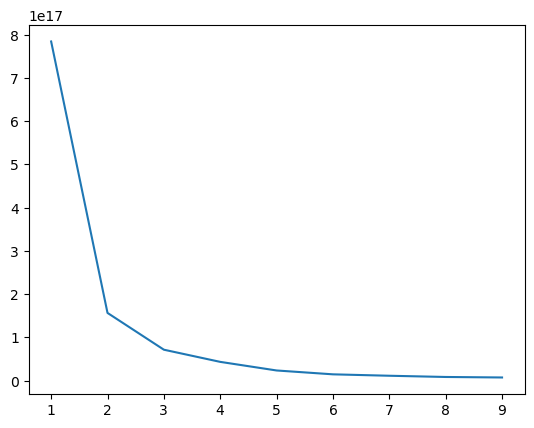

In [110]:
plt.plot(range(1,10),wcss)
#elbow dirsek metodu

In [111]:
#pip install yellowbrick  ---veri görselleştirmeyi daha güzel yapan paket

In [112]:
from yellowbrick.cluster import KElbowVisualizer

In [113]:
km=KMeans()

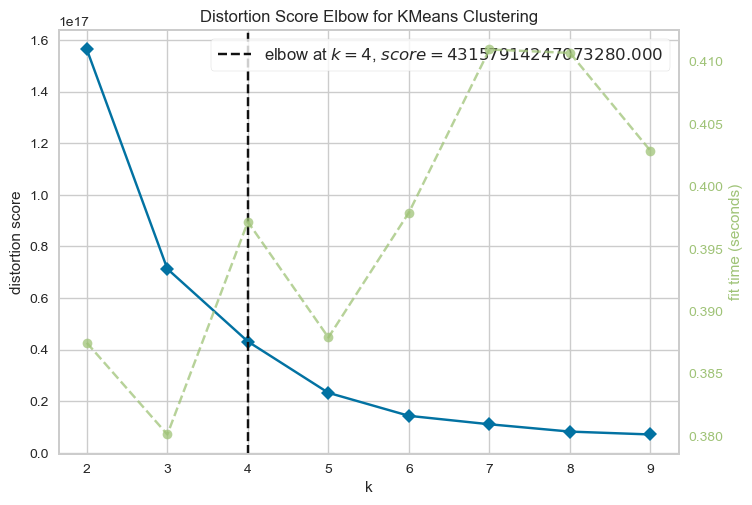

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor

# Hierarchical Clustering- Hiyerarşi-ikinci bir gruplama

In [115]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [116]:
data=linkage(x,method='ward',metric='euclidean')

#ward = en optimimu bulmaya yarıyor hatayı minimize ediyor
#euclidean = uzaklıkları ölçmeye yarıyor

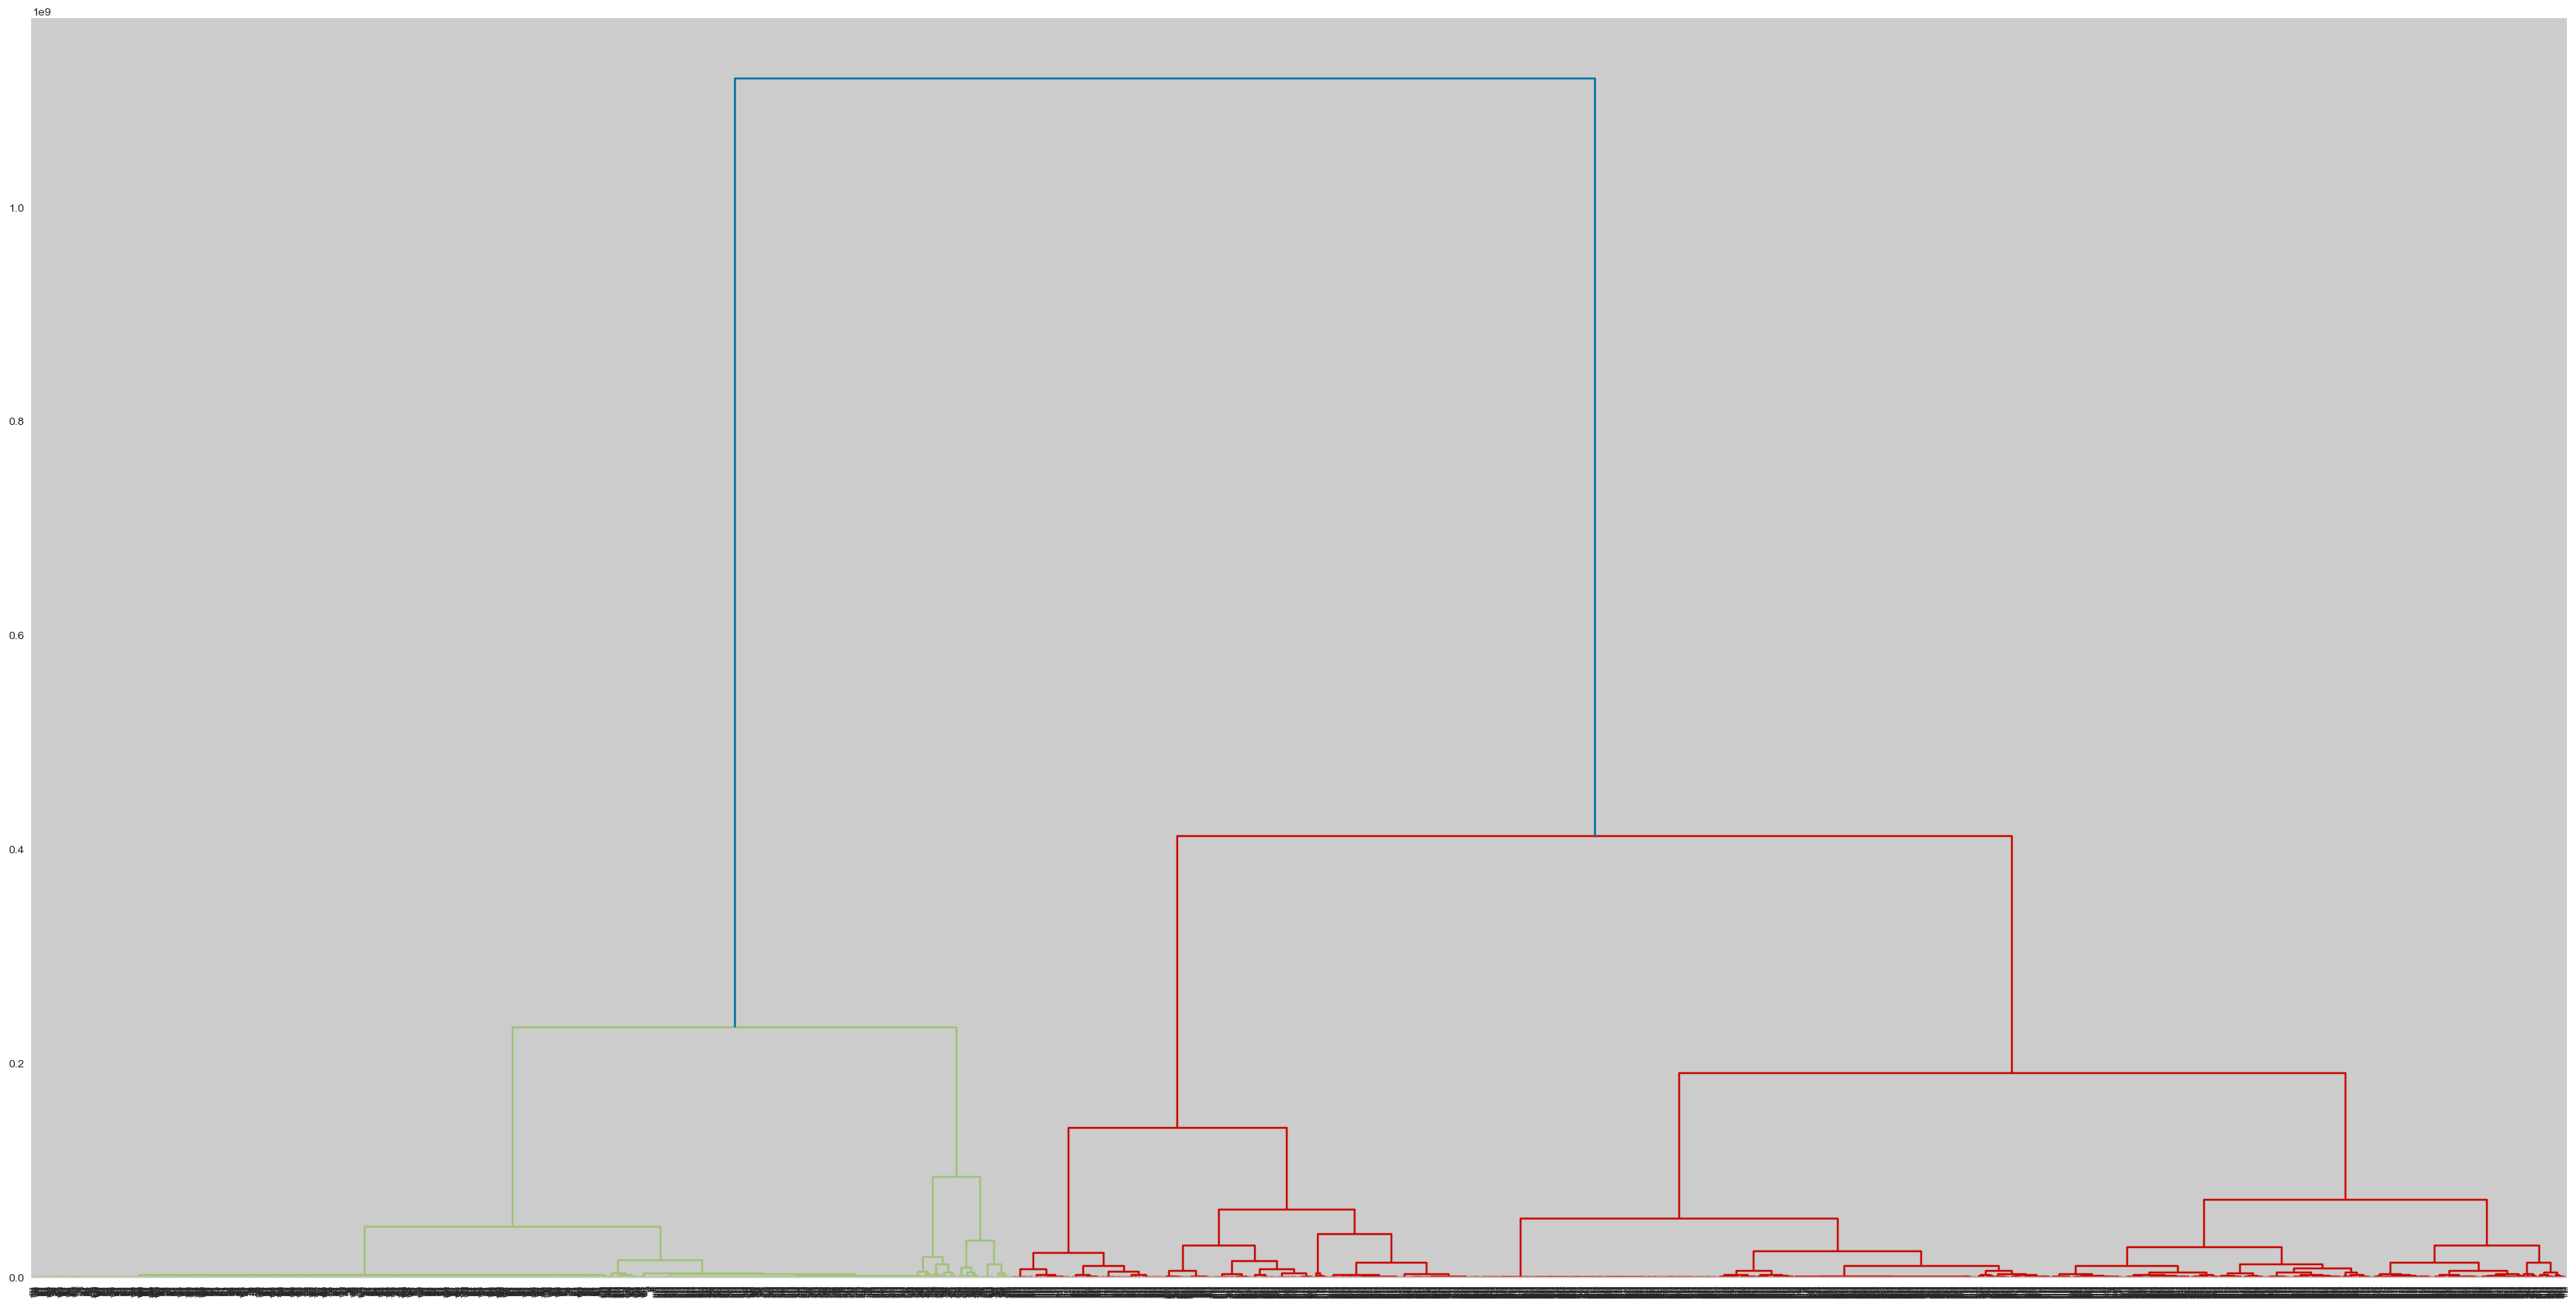

In [117]:
plt.figure(figsize=(40,20))
dendrogram(data)
plt.show()